In [ ]:
# Installing Dependencies
!pip install qiskit==0.43.1 qiskit-aer==0.12.0 matplotlib==3.7.1 --force-reinstall --quiet


In [2]:
# Import Required Libraries
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace, entropy
from qiskit.visualization import plot_state_city
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Creating a Bell State and Convert to Density Matrix
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Simulate statevector and convert to density matrix
sv = Statevector.from_instruction(qc)
rho = DensityMatrix(sv)
rho.draw('latex')

<IPython.core.display.Latex object>

In [4]:
# Computing Von Neumann Entropy of Full State and Subsystems
# Full system entropy
S_AB = entropy(rho)

# Reduced density matrices
rho_A = partial_trace(rho, [1])
rho_B = partial_trace(rho, [0])

S_A = entropy(rho_A)
S_B = entropy(rho_B)

print(f"Entropy S(AB): {S_AB:.4f}")
print(f"Entropy S(A):  {S_A:.4f}")
print(f"Entropy S(B):  {S_B:.4f}")

Entropy S(AB): 0.0000
Entropy S(A):  1.0000
Entropy S(B):  1.0000


In [5]:
# Computing Mutual Information I(A:B) = S(A) + S(B) - S(AB)
I_AB = S_A + S_B - S_AB
print(f"Mutual Information I(A:B): {I_AB:.4f}")

Mutual Information I(A:B): 2.0000


In [23]:
# Applying Depolarizing Noise and Saving Density Matrix Properly

from qiskit.providers.aer import AerSimulator

# Building the noise model
noise_model = NoiseModel()
error_1q = depolarizing_error(0.2, 1)
error_2q = depolarizing_error(0.1, 2)
noise_model.add_all_qubit_quantum_error(error_1q, ['u3', 'id'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

# Initializing simulator with density_matrix method
sim = AerSimulator(method="density_matrix")

# Copying the circuit and add save_density_matrix instruction directly to it
noisy_circuit = qc.copy()
noisy_circuit.save_density_matrix()

# Transpiling and running with noise model
tqc = transpile(noisy_circuit, sim)
result = sim.run(tqc, noise_model=noise_model, shots=1).result()

# Extracting the density matrix from the result
rho_noisy = result.data(0)['density_matrix']
rho_noisy = DensityMatrix(rho_noisy)

In [20]:
# Entropy and Mutual Information After Noise
S_AB_noisy = entropy(rho_noisy)
rho_A_noisy = partial_trace(rho_noisy, [1])
rho_B_noisy = partial_trace(rho_noisy, [0])
S_A_noisy = entropy(rho_A_noisy)
S_B_noisy = entropy(rho_B_noisy)
I_AB_noisy = S_A_noisy + S_B_noisy - S_AB_noisy

print("After Depolarizing Noise:")
print(f"Entropy S(AB): {S_AB_noisy:.4f}")
print(f"Entropy S(A):  {S_A_noisy:.4f}")
print(f"Entropy S(B):  {S_B_noisy:.4f}")
print(f"Mutual Information I(A:B): {I_AB_noisy:.4f}")

After Depolarizing Noise:
Entropy S(AB): 0.5032
Entropy S(A):  1.0000
Entropy S(B):  1.0000
Mutual Information I(A:B): 1.4968


Ideal Bell State


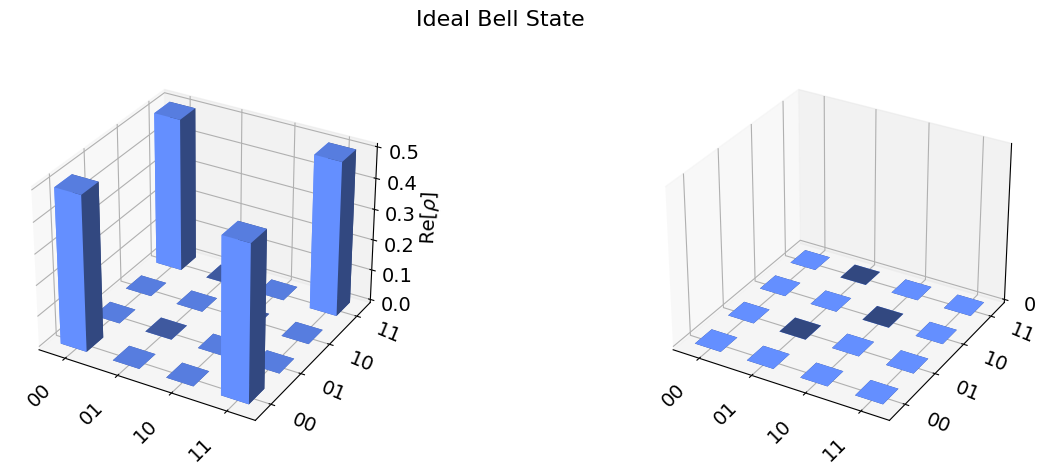

In [37]:
# Plotting State Before and After Noise
print("Ideal Bell State")
plot_state_city(rho, title="Ideal Bell State")

Noisy Bell State (Depolarizing)


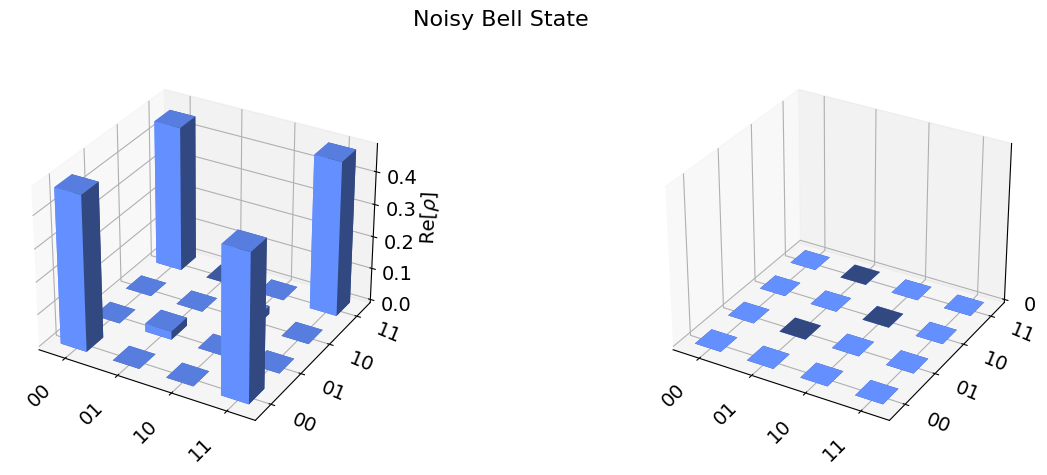

In [38]:
print("Noisy Bell State (Depolarizing)")
plot_state_city(rho_noisy, title="Noisy Bell State")

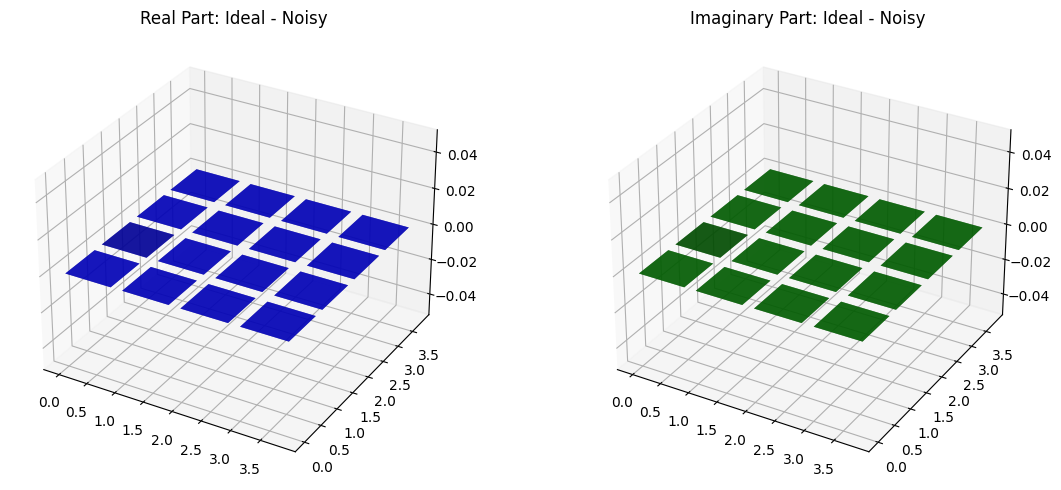

In [49]:
import matplotlib.pyplot as plt

# Computing the matrix difference
diff_dm = ideal_dm.data - noisy_dm.data

# Plotting real and imaginary parts of the difference
fig = plt.figure(figsize=(12, 5))

# Real part
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
xpos, ypos = np.meshgrid(range(4), range(4))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = dy = 0.8 * np.ones_like(zpos)
dz = np.real(diff_dm.flatten())

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', alpha=0.7)
ax1.set_title("Real Part: Ideal - Noisy")

# Imaginary part
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
dz_im = np.imag(diff_dm.flatten())

ax2.bar3d(xpos, ypos, zpos, dx, dy, dz_im, color='g', alpha=0.7)
ax2.set_title("Imaginary Part: Ideal - Noisy")

plt.tight_layout()
plt.show()
